In [1]:
import pandas as pd
data=pd.read_csv('data.csv',delimiter='\t')
data.head()


,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology


In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Basic statistics of the dataset
print("\nBasic statistics:")
print(data.describe(include='all'))

# Data types of each column
print("\nData types of each column:")
print(data.dtypes)


Missing values per column:
Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11425
Length: 172, dtype: int64

Basic statistics:
                 Q1A           Q1I           Q1E           Q2A           Q2I  \
count   39775.000000  39775.000000  3.977500e+04  39775.000000  39775.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        2.619485     21.555977  6.970591e+03      2.172269     21.248070   
std         1.032117     12.133621  8.670513e+04      1.111563     12.125288   
min         1.000000      1.000000  1.800000e+02      1.000000      1.000000   
25%         2.000000     11.000000  2.664000e+03      1.000000     1

In [3]:
import numpy as np
data_1=data.copy()
data_1['major']=data_1['major'].replace(np.nan,'No Degree')
time = [i for i in data_1.iloc[:,0:126] if  'E' in i]
position = [i for i in data_1.iloc[:,0:126] if  'I' in i]
data_1=data_1.drop(position,axis=1)
data_1=data_1.drop(time,axis=1)
data_1=data_1.drop(data_1.iloc[:,43:47],axis=1)
data_2=data_1.copy()
data_2=data_2.drop(data_2.iloc[:,53:69],axis=1)
data_2=data_2.replace(to_replace=0,value=3)
data_2=data_2.rename(columns={'TIPI1':'Extraverted-enthusiastic','TIPI2':'Critical-quarrelsome',
                            'TIPI3':'Dependable-self_disciplined','TIPI4':'Anxious-easily upset',
                            'TIPI5':'Open to new experiences-complex','TIPI6':'Reserved-quiet',
                            'TIPI7':'Sympathetic-warm','TIPI8':'Disorganized-careless','TIPI9':'Calm-emotionally_stable',
                            'TIPI10':'Conventional-uncreative'})
print('Shape',data_2.shape)
print('Attributes',data_2.columns)

Shape (39775, 68)
Attributes Index(['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A', 'Q10A',
       'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A', 'Q19A',
       'Q20A', 'Q21A', 'Q22A', 'Q23A', 'Q24A', 'Q25A', 'Q26A', 'Q27A', 'Q28A',
       'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A', 'Q37A',
       'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'country',
       'Extraverted-enthusiastic', 'Critical-quarrelsome',
       'Dependable-self_disciplined', 'Anxious-easily upset',
       'Open to new experiences-complex', 'Reserved-quiet', 'Sympathetic-warm',
       'Disorganized-careless', 'Calm-emotionally_stable',
       'Conventional-uncreative', 'education', 'urban', 'gender', 'engnat',
       'age', 'screensize', 'uniquenetworklocation', 'hand', 'religion',
       'orientation', 'race', 'voted', 'married', 'familysize', 'major'],
      dtype='object')


In [38]:
data_2=data_2.replace([np.inf, -np.inf], np.nan)
data_2=data_2.dropna()

In [39]:
def condition(x):
    if x<=10:
        return 'Under 10'
    if  10<=x<=16:
        return ' Primary Children'
    if 17<=x<=21:
        return 'Secondary Children'
    if 21<=x<=35:
        return 'Adults'
    if 36<=x<=48:
        return 'Elder Adults'
    if x>=49:
        return 'Older People'

data_2['Age_Groups']=data_2['age'].apply(condition)
data_2.head()

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,4,4,2,4,4,4,4,4,2,1,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,4,1,2,3,4,4,3,4,3,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,1,4,1,4,3,1,3,2,4,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,3,2,1,3,3,4,2,3,3,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,2,3,4,4,2,4,4,4,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [42]:
new_data=data_2.iloc[:,42:]
data_3=data_2.filter(regex='Q\d{1,2}A')
data_3.head()

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\temp\ipykernel_24464\3215369408.py:2: SyntaxWarning: invalid escape sequence '\d'
  data_3=data_2.filter(regex='Q\d{1,2}A')


,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q33A,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A
0,4,4,2,4,4,4,4,4,2,1,...,2,3,4,4,1,2,4,3,4,4
1,4,1,2,3,4,4,3,4,3,2,...,3,2,2,3,4,2,2,1,2,2
2,3,1,4,1,4,3,1,3,2,4,...,1,4,3,4,4,4,2,2,1,4
3,2,3,2,1,3,3,4,2,3,3,...,2,4,1,1,2,1,3,4,4,2
4,2,2,3,4,4,2,4,4,4,3,...,4,4,3,4,3,3,3,4,4,3


In [7]:
def sub(data_3):
    return data_3.subtract(1,axis=1)
data_3=sub(data_3)
DASS_keys = {'Depression': [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42],
             'Anxiety': [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41],
             'Stress': [1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]}
Dep = []
for i in DASS_keys["Depression"]:
    Dep.append('Q'+str(i)+'A')
Stress = []
for i in DASS_keys["Stress"]:
    Stress.append('Q'+str(i)+'A')
Anx = []
for i in DASS_keys["Anxiety"]:
    Anx.append('Q'+str(i)+'A')
depression= data_3.filter(Dep)
stress = data_3.filter(Stress)
anxiety = data_3.filter(Anx)

In [8]:
def scores(source):
    col=list(source)
    source['Total_Count']=source[col].sum(axis=1)
    return source
depression=scores(depression)
stress=scores(stress)
anxiety=scores(anxiety)

In [9]:
Depression=pd.merge(depression,new_data,how='left',left_index=True,right_index=True)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,1,3,0,3,3,2,0,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,1,3,1,3,2,3,1,1,2,1,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,3,3,3,3,3,3,3,3,0,3,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,2,0,1,2,0,0,1,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,2,3,2,3,2,3,2,1,3,2,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [10]:
Stress=pd.merge(stress,new_data,how='inner',left_index=True,right_index=True)
Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,3,3,3,3,3,3,3,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,3,3,3,1,1,3,1,2,2,2,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,2,2,2,1,0,0,1,2,1,1,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,1,2,1,1,0,3,0,0,3,2,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,1,3,1,3,3,3,2,1,1,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [11]:
Anxiety=pd.merge(anxiety,new_data,how='inner',left_index=True,right_index=True)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups
0,3,3,3,1,3,2,2,3,3,2,...,1,1,12,1,10,2,1,2,No Degree,Primary Children
1,0,2,2,2,2,0,0,0,1,3,...,1,2,7,3,70,2,1,4,No Degree,Primary Children
2,0,0,0,1,3,1,0,1,1,0,...,1,1,4,3,60,1,1,3,No Degree,Secondary Children
3,2,0,3,2,1,0,1,0,0,0,...,1,2,4,5,70,2,1,5,biology,Primary Children
4,1,3,3,3,3,3,3,3,3,3,...,2,3,10,1,10,2,1,4,Psychology,Secondary Children


In [12]:
def condition(x):
    if x<=9:
        return 'Normal'
    if  10<=x<=13:
        return 'Mild'
    if 14<=x<=20:
        return 'Moderate'
    if 21<=x<=27:
        return 'Severe'
    if x>28:
        return 'Extremely Severe'

Depression['Condition']=Depression['Total_Count'].apply(condition)
Depression.head()

,Q3A,Q5A,Q10A,Q13A,Q16A,Q17A,Q21A,Q24A,Q26A,Q31A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,...,2,4,5,70,2,1,5,biology,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [13]:
def condition(x):
    if x<=14:
        return 'Normal'
    if  15<=x<=18:
        return 'Mild'
    if 19<=x<=25:
        return 'Moderate'
    if 26<=x<=33:
        return 'Severe'
    if x>=34:
        return 'Extremely Severe'

Stress['Condition']=Stress['Total_Count'].apply(condition)

Stress.head()

,Q1A,Q6A,Q8A,Q11A,Q12A,Q14A,Q18A,Q22A,Q27A,Q29A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,3,3,3,3,3,3,3,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,3,3,3,1,1,3,1,2,2,2,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,2,2,2,1,0,0,1,2,1,1,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Mild
3,1,2,1,1,0,3,0,0,3,2,...,2,4,5,70,2,1,5,biology,Primary Children,Mild
4,1,1,3,1,3,3,3,2,1,1,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Severe


In [14]:
def condition(x):
    if x<=7:
        return 'Normal'
    if  8<=x<=9:
        return 'Mild'
    if 10<=x<=14:
        return 'Moderate'
    if 15<=x<=19:
        return 'Severe'
    if x>19:
        return 'Extremely Severe'

Anxiety['Condition']=Anxiety['Total_Count'].apply(condition)
Anxiety.head()

,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
0,3,3,3,1,3,2,2,3,3,2,...,1,12,1,10,2,1,2,No Degree,Primary Children,Extremely Severe
1,0,2,2,2,2,0,0,0,1,3,...,2,7,3,70,2,1,4,No Degree,Primary Children,Severe
2,0,0,0,1,3,1,0,1,1,0,...,1,4,3,60,1,1,3,No Degree,Secondary Children,Moderate
3,2,0,3,2,1,0,1,0,0,0,...,2,4,5,70,2,1,5,biology,Primary Children,Severe
4,1,3,3,3,3,3,3,3,3,3,...,3,10,1,10,2,1,4,Psychology,Secondary Children,Extremely Severe


In [15]:
def change_var(x):
    if x=='Primary Children':
        return 0
    elif x=='Secondary Children':
        return 1
    elif x=='Adults':
        return 2
    elif x=='Elder Adults':
        return 3
    elif x=='Older People':
        return 4



Depression['Age_Groups']=Depression['Age_Groups'].apply(change_var)
Stress['Age_Groups']=Stress['Age_Groups'].apply(change_var)
Anxiety['Age_Groups']=Anxiety['Age_Groups'].apply(change_var)

In [16]:
Depression=Depression.dropna()
Stress=Stress.dropna()
Anxiety=Anxiety.dropna()

In [17]:
Depression=Depression.drop(columns=['Total_Count','country','age'])
Stress=Stress.drop(columns=['Total_Count','country','age'])
Anxiety=Anxiety.drop(columns=['Total_Count','country','age'])

In [18]:
print(Depression.columns)
print(Stress.columns)
print(Anxiety.columns)


Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'major', 'Age_Groups', 'Condition'],
      dtype='object')
Index(['Q1A', 'Q6A', 'Q8A', 'Q11A', 'Q12A', 'Q14A', 'Q18A', 'Q22A', 'Q27A',
       'Q29A', 'Q32A', 'Q33A', 'Q35A', 'Q39A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
  

EDA

In [19]:
# Overview of datasets
Depression.describe(include='all')
Stress.describe(include='all')
Anxiety.describe(include='all')


,Q2A,Q4A,Q7A,Q9A,Q15A,Q19A,Q20A,Q23A,Q25A,Q28A,...,hand,religion,orientation,race,voted,married,familysize,major,Age_Groups,Condition
count,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,...,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813.000000,34813,34813.000000,34813
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5103,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Degree,NaN,Extremely Severe
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7561,NaN,11538
mean,1.156350,0.898515,0.864246,1.624508,0.778703,0.889208,1.277080,0.526240,1.151265,1.161951,...,1.143452,7.842990,1.842731,29.687473,1.692127,1.194468,3.693591,NaN,1.661190,NaN
std,1.105645,1.019325,1.003619,1.065120,0.959527,1.047445,1.106234,0.833166,1.068458,1.056419,...,0.400921,3.398458,1.297696,25.606736,0.478787,0.475997,2.071447,NaN,0.736765,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,NaN,1.000000,NaN
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,1.000000,10.000000,1.000000,1.000000,2.000000,NaN,1.000000,NaN
50%,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,10.000000,1.000000,10.000000,2.000000,1.000000,3.000000,NaN,2.000000,NaN
75%,2.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,...,1.000000,10.000000,3.000000,60.000000,2.000000,1.000000,5.000000,NaN,2.000000,NaN


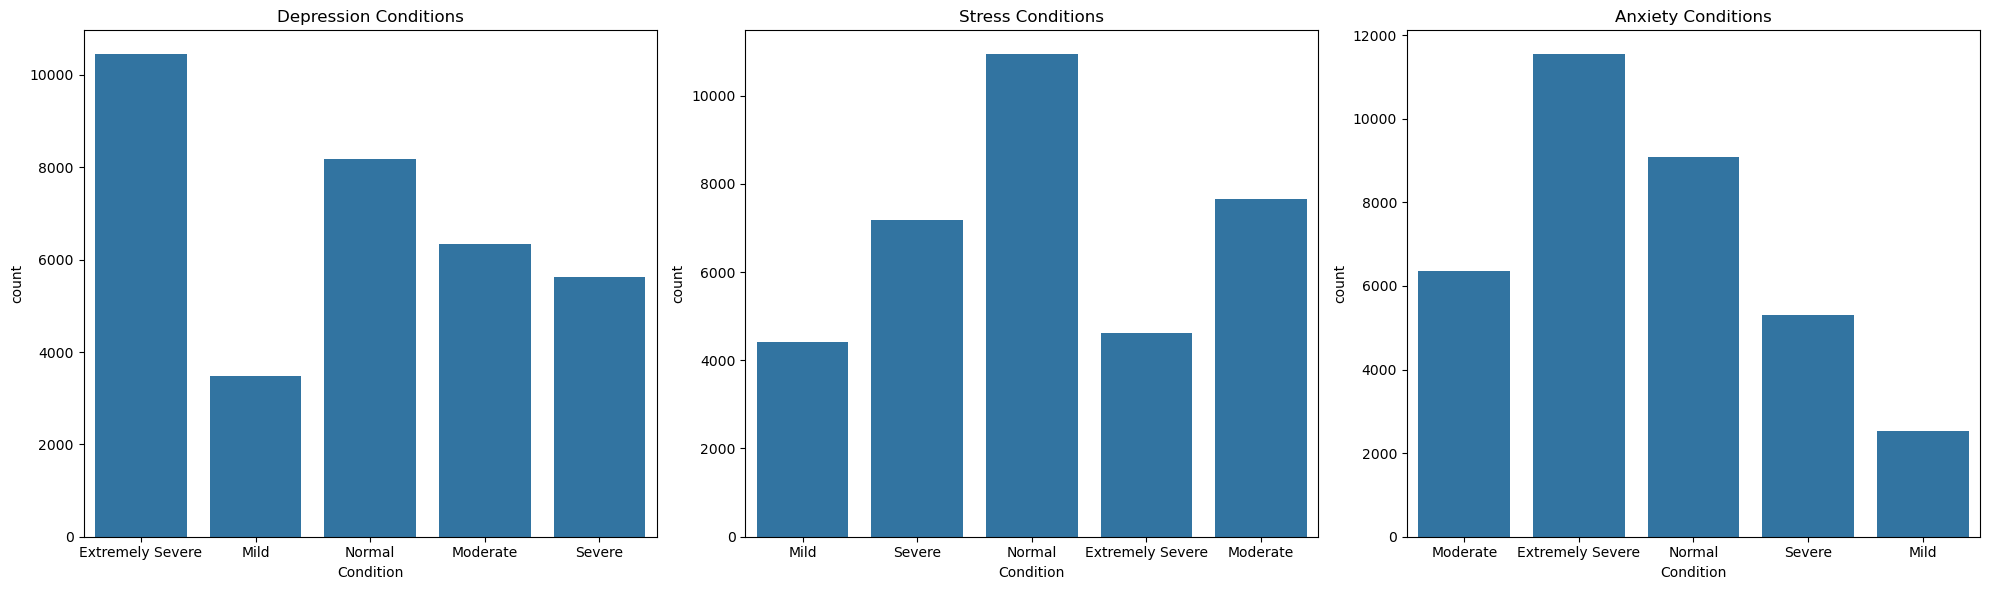

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of conditions
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=Depression, x="Condition").set_title("Depression Conditions")
plt.subplot(1, 3, 2)
sns.countplot(data=Stress, x="Condition").set_title("Stress Conditions")
plt.subplot(1, 3, 3)
sns.countplot(data=Anxiety, x="Condition").set_title("Anxiety Conditions")
plt.tight_layout()
plt.show()


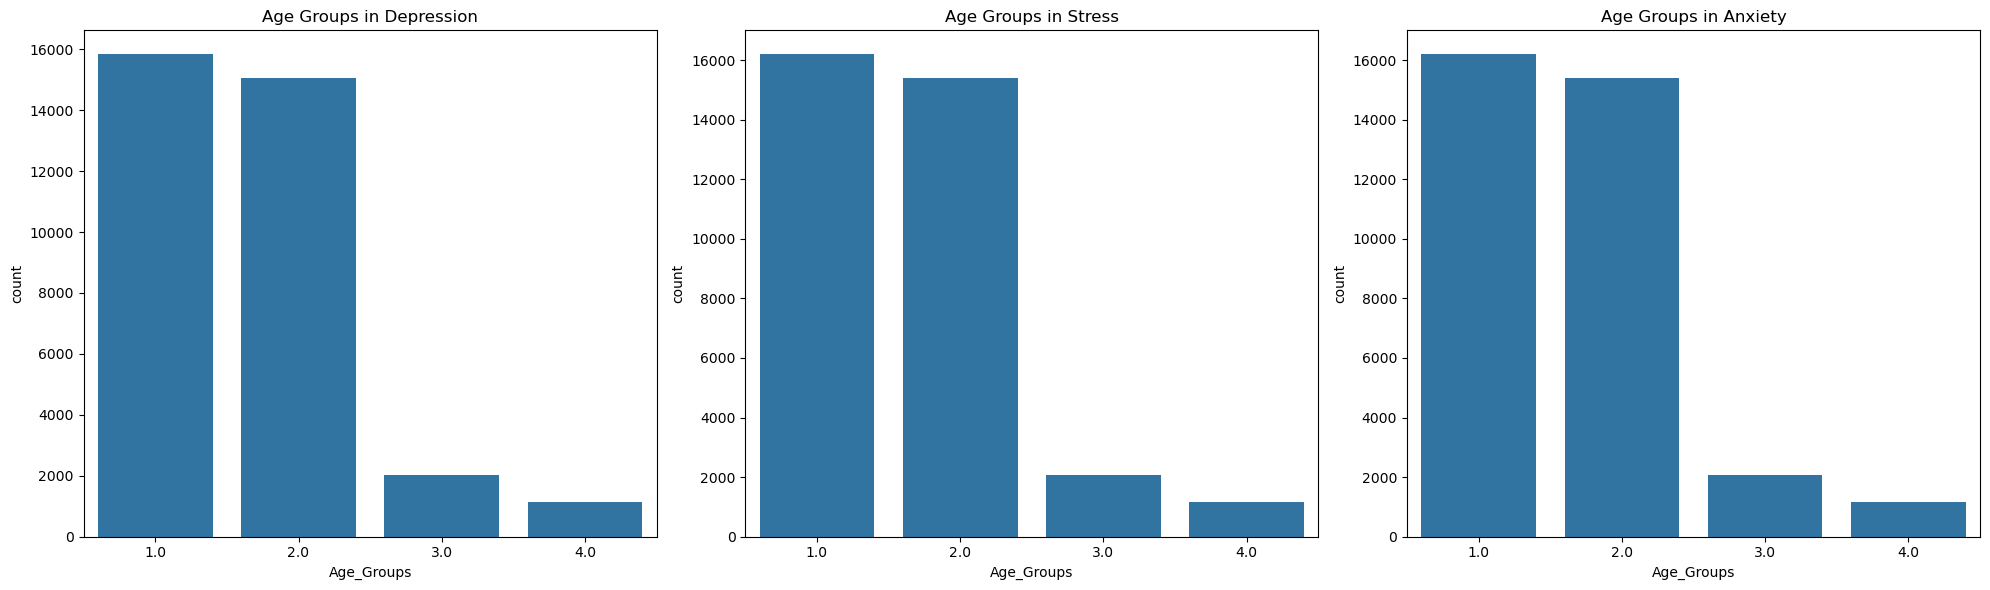

In [21]:
# Distribution of Age Groups
plt.figure(figsize=(20, 6))
plt.subplot(1, 3, 1)
sns.countplot(data=Depression, x="Age_Groups").set_title("Age Groups in Depression")
plt.subplot(1, 3, 2)
sns.countplot(data=Stress, x="Age_Groups").set_title("Age Groups in Stress")
plt.subplot(1, 3, 3)
sns.countplot(data=Anxiety, x="Age_Groups").set_title("Age Groups in Anxiety")
plt.tight_layout()
plt.show()


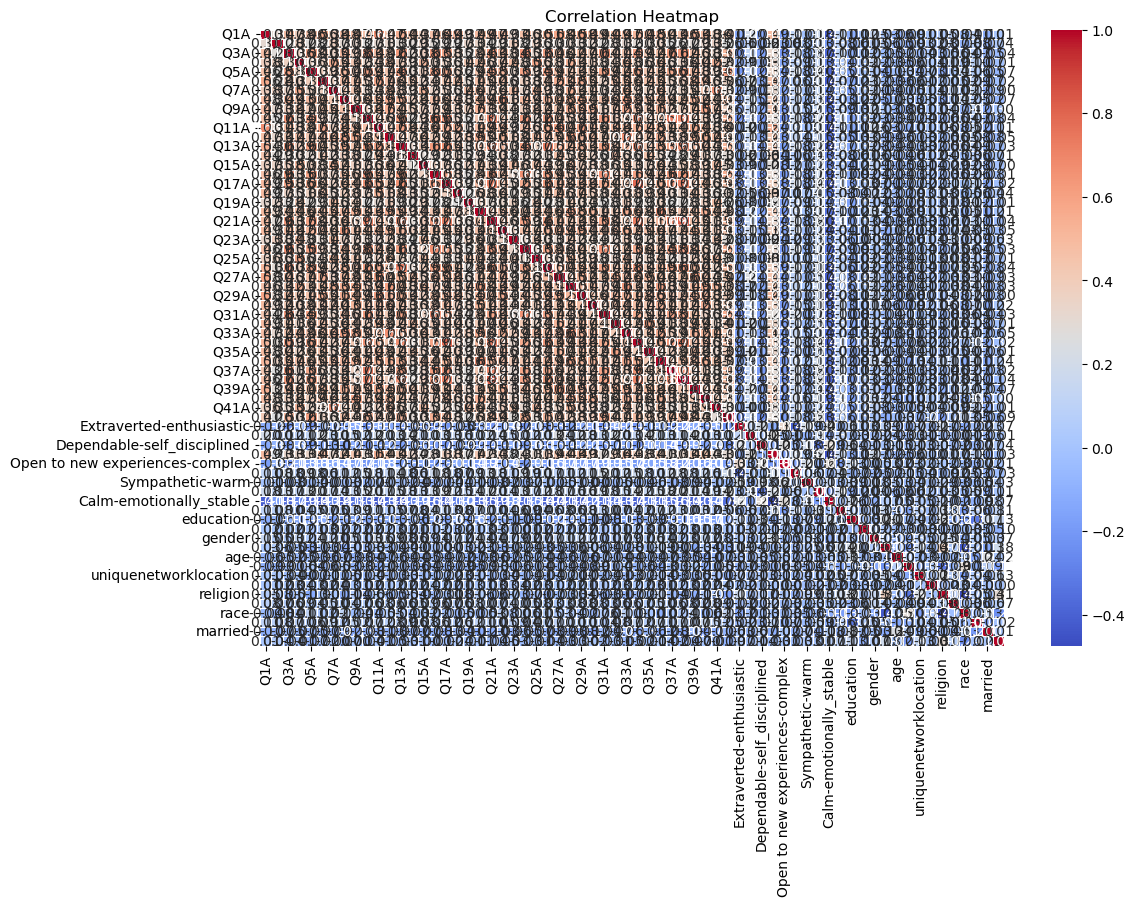

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Selecting numeric columns
numeric_columns = data_2.select_dtypes(include=['float64', 'int64']).columns

# Calculating correlations
correlation_matrix = data_2[numeric_columns].corr()

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


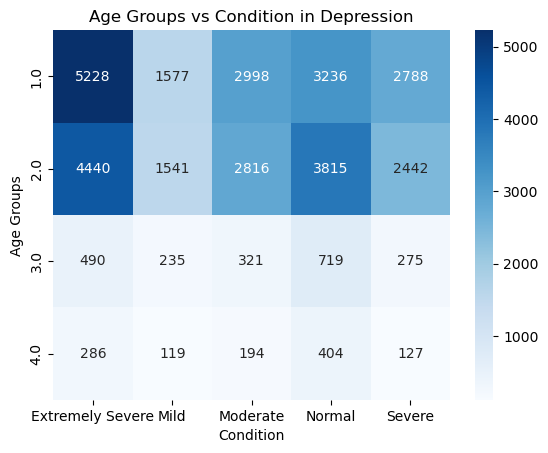

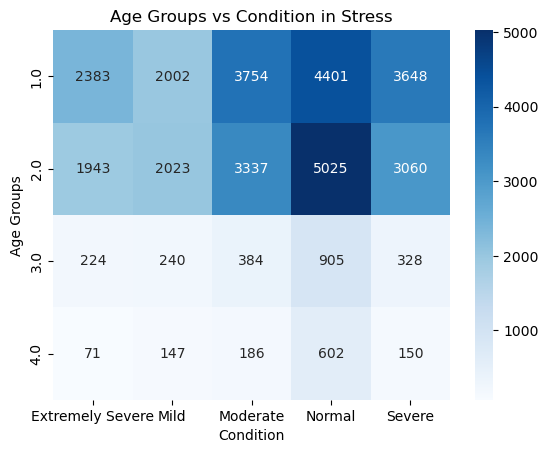

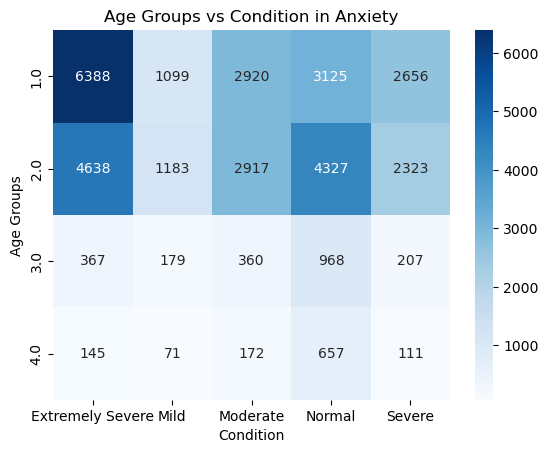

In [23]:
# Function to create heatmap for Age Groups vs Condition
def condition_vs_age(df, title):
    heatmap_data = pd.crosstab(df["Age_Groups"], df["Condition"])
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.ylabel("Age Groups")
    plt.xlabel("Condition")
    plt.show()

# Heatmap for Depression
condition_vs_age(Depression, "Age Groups vs Condition in Depression")

# Heatmap for Stress
condition_vs_age(Stress, "Age Groups vs Condition in Stress")

# Heatmap for Anxiety
condition_vs_age(Anxiety, "Age Groups vs Condition in Anxiety")


2. Group Comparisons
a. Boxplots by Marital Status and Major

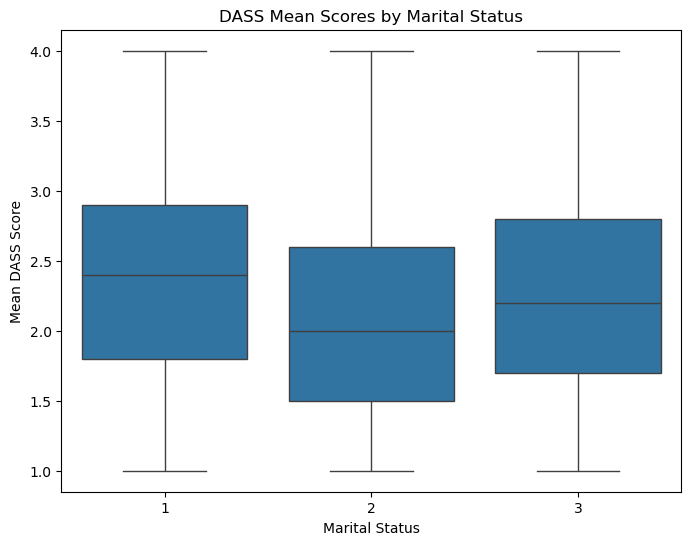

In [24]:
# Boxplot for marital status
plt.figure(figsize=(8, 6))
sns.boxplot(x='married', y=data_2.iloc[:, :10].mean(axis=1), data=data_2)
plt.title('DASS Mean Scores by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Mean DASS Score')
plt.show()




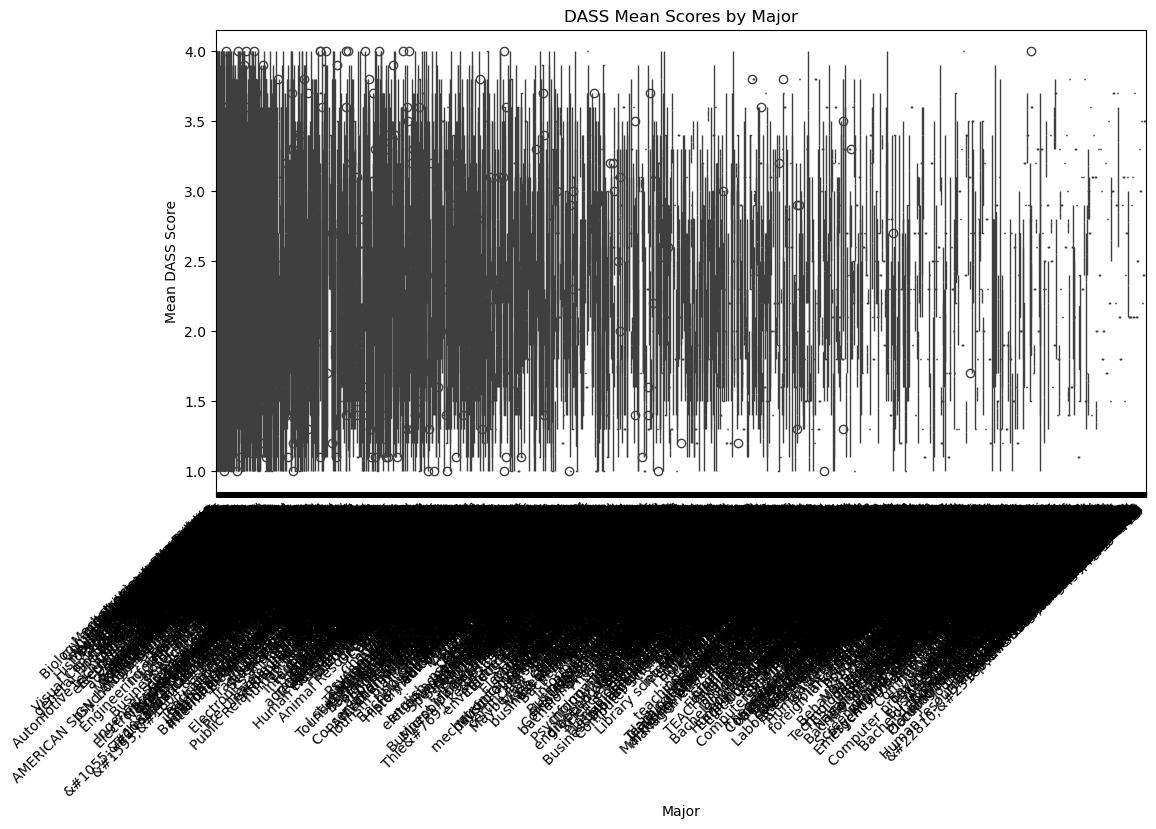

In [25]:
# Boxplot for major
plt.figure(figsize=(12, 6))
sns.boxplot(x='major', y=data_2.iloc[:, :10].mean(axis=1), data=data_2)
plt.xticks(rotation=45, ha='right')
plt.title('DASS Mean Scores by Major')
plt.xlabel('Major')
plt.ylabel('Mean DASS Score')
plt.show()

1. Post-Hoc Analysis (If ANOVA Results Are Significant)
If the ANOVA results show significant differences between groups (p-value < 0.05), perform post-hoc tests (e.g., Tukey's HSD) to identify which groups differ.

Code for Tukey’s HSD Test:



In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Assuming Depression, Stress, and Anxiety DataFrames are already prepared
# Add a 'Category' column to distinguish between datasets
Depression['Category'] = 'Depression'
Stress['Category'] = 'Stress'
Anxiety['Category'] = 'Anxiety'

# Combine the datasets
combined_data = pd.concat([Depression[['Condition', 'Category', 'Age_Groups']],
                           Stress[['Condition', 'Category', 'Age_Groups']],
                           Anxiety[['Condition', 'Category', 'Age_Groups']]])

# Map Condition to numeric values for statistical testing
condition_map = {'Normal': 0, 'Mild': 1, 'Moderate': 2, 'Severe': 3, 'Extremely Severe': 4}
combined_data['Condition_numeric'] = combined_data['Condition'].map(condition_map)

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(
    endog=combined_data['Condition_numeric'],  # Dependent variable
    groups=combined_data['Category'],         # Grouping variable
    alpha=0.05                                # Significance level
)

# Display the Tukey HSD summary
print(tukey.summary())


    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
   Anxiety Depression   -0.024 0.0971 -0.0513  0.0032  False
   Anxiety     Stress  -0.5037    0.0 -0.5309 -0.4766   True
Depression     Stress  -0.4797    0.0  -0.507 -0.4524   True
------------------------------------------------------------


Model Training

In [27]:
Depression = Depression.drop(columns=['major', 'Category'])


In [28]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'Depression' DataFrame is already loaded in your environment

# Prepare features and target
features = Depression.drop(columns=["Condition"])  # Drop the target column
target = Depression["Condition"]  # Define the target column

# Split into train and test sets
X_train_depression, X_test_depression, y_train_depression, y_test_depression = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Save the splits as CSV files
X_train_depression.to_csv("X_train_depression.csv", index=False)
y_train_depression.to_csv("y_train_depression.csv", index=False)
X_test_depression.to_csv("X_test_depression.csv", index=False)
y_test_depression.to_csv("y_test_depression.csv", index=False)

print("Train and test splits for Depression dataset have been saved as CSV files.")


Train and test splits for Depression dataset have been saved as CSV files.


In [29]:
Stress=Stress.drop(columns=['major', 'Category'])

In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'Stress' DataFrame is already loaded in your environment

# Prepare features and target
features = Stress.drop(columns=["Condition"])  # Drop the target column
target = Stress["Condition"]  # Define the target column

# Split into train and test sets
X_train_stress, X_test_stress, y_train_stress, y_test_stress = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Save the splits as CSV files
X_train_stress.to_csv("X_train_stress.csv", index=False)
y_train_stress.to_csv("y_train_stress.csv", index=False)
X_test_stress.to_csv("X_test_stress.csv", index=False)
y_test_stress.to_csv("y_test_stress.csv", index=False)

print("Train and test splits for Stress dataset have been saved as CSV files.")


Train and test splits for Stress dataset have been saved as CSV files.


In [31]:
Anxiety=Anxiety.drop(columns=['major', 'Category'])

In [32]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'Anxiety' DataFrame is already loaded in your environment

# Prepare features and target
features = Anxiety.drop(columns=["Condition"])  # Drop the target column
target = Anxiety["Condition"]  # Define the target column

# Split into train and test sets
X_train_anxiety, X_test_anxiety, y_train_anxiety, y_test_anxiety = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Save the splits as CSV files
X_train_anxiety.to_csv("X_train_anxiety.csv", index=False)
y_train_anxiety.to_csv("y_train_anxiety.csv", index=False)
X_test_anxiety.to_csv("X_test_anxiety.csv", index=False)
y_test_anxiety.to_csv("y_test_anxiety.csv", index=False)

print("Train and test splits for Anxiety dataset have been saved as CSV files.")


Train and test splits for Anxiety dataset have been saved as CSV files.


**Depression Model**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
import pickle

# Random Forest Training with Hyperparameter Tuning
def train_random_forest(X_train_depression, y_train_depression, X_test_depression, y_test_depression):
    # Initialize Random Forest Classifier
    rfc = RandomForestClassifier(random_state=42)

    # Hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(
        estimator=rfc,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train_depression, y_train_depression)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the trained model
    model_filename = "random_forest_Depression.pkl"
    with open(model_filename, "wb") as f:
        pickle.dump(best_model, f)
    print(f"Model saved as {model_filename}")

    # Evaluate the model
    y_pred = best_model.predict(X_test_depression)
    accuracy = accuracy_score(y_test_depression, y_pred)
    report = classification_report(y_test_depression, y_pred)

    # Print results
    print(f"Accuracy for Depression: {accuracy:.2f}")
    print(f"Classification Report for Depression:\n{report}")

# Call the function with appropriate variables
train_random_forest(X_train_depression, y_train_depression, X_test_depression, y_test_depression)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model saved as random_forest_Depression.pkl
Accuracy for Depression: 0.93
Classification Report for Depression:
                  precision    recall  f1-score   support

Extremely Severe       0.98      0.99      0.98      2089
            Mild       0.86      0.66      0.75       694
        Moderate       0.86      0.93      0.89      1266
          Normal       0.93      0.98      0.96      1635
          Severe       0.93      0.90      0.92      1127

        accuracy                           0.93      6811
       macro avg       0.91      0.89      0.90      6811
    weighted avg       0.93      0.93      0.93      6811



**Stress Model**

In [34]:
# Random Forest Training with Hyperparameter Tuning
def train_random_forest(X_train_stress, y_train_stress, X_test_stress, y_test_stress):
    # Initialize Random Forest Classifier
    rfc = RandomForestClassifier(random_state=42)

    # Hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(
        estimator=rfc,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train_stress, y_train_stress)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the trained model
    model_filename = "random_forest_stress.pkl"
    with open(model_filename, "wb") as f:
        pickle.dump(best_model, f)
    print(f"Model saved as {model_filename}")

    # Evaluate the model
    y_pred = best_model.predict(X_test_stress)
    accuracy = accuracy_score(y_test_stress, y_pred)
    report = classification_report(y_test_stress, y_pred)

    # Print results
    print(f"Accuracy for stress: {accuracy:.2f}")
    print(f"Classification Report for stress:\n{report}")

# Call the function with appropriate variables
train_random_forest(X_train_stress, y_train_stress, X_test_stress, y_test_stress)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model saved as random_forest_stress.pkl
Accuracy for stress: 0.90
Classification Report for stress:
                  precision    recall  f1-score   support

Extremely Severe       0.98      0.90      0.94       924
            Mild       0.84      0.63      0.72       883
        Moderate       0.83      0.92      0.87      1532
          Normal       0.94      0.97      0.95      2187
          Severe       0.88      0.92      0.90      1437

        accuracy                           0.90      6963
       macro avg       0.90      0.87      0.88      6963
    weighted avg       0.90      0.90      0.89      6963



**Anxiety Model**

In [35]:
# Random Forest Training with Hyperparameter Tuning
def train_random_forest(X_train_anxiety, y_train_anxiety, X_test_anxiety, y_test_anxiety):
    # Initialize Random Forest Classifier
    rfc = RandomForestClassifier(random_state=42)

    # Hyperparameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    # Grid Search for Hyperparameter Tuning
    grid_search = GridSearchCV(
        estimator=rfc,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )

    # Fit the model
    grid_search.fit(X_train_anxiety, y_train_anxiety)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Save the trained model
    model_filename = "random_forest_anxiety.pkl"
    with open(model_filename, "wb") as f:
        pickle.dump(best_model, f)
    print(f"Model saved as {model_filename}")

    # Evaluate the model
    y_pred = best_model.predict(X_test_anxiety)
    accuracy = accuracy_score(y_test_anxiety, y_pred)
    report = classification_report(y_test_anxiety, y_pred)

    # Print results
    print(f"Accuracy for anxiety: {accuracy:.2f}")
    print(f"Classification Report for anxiety:\n{report}")

# Call the function with appropriate variables
train_random_forest(X_train_anxiety, y_train_anxiety, X_test_anxiety, y_test_anxiety)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Model saved as random_forest_anxiety.pkl
Accuracy for anxiety: 0.86
Classification Report for anxiety:
                  precision    recall  f1-score   support

Extremely Severe       0.93      0.98      0.95      2308
            Mild       0.76      0.07      0.13       506
        Moderate       0.73      0.92      0.81      1274
          Normal       0.89      0.99      0.94      1816
          Severe       0.85      0.69      0.76      1059

        accuracy                           0.86      6963
       macro avg       0.83      0.73      0.72      6963
    weighted avg       0.86      0.86      0.84      6963



In [36]:
print(Depression.columns)



Index(['Q3A', 'Q5A', 'Q10A', 'Q13A', 'Q16A', 'Q17A', 'Q21A', 'Q24A', 'Q26A',
       'Q31A', 'Q34A', 'Q37A', 'Q38A', 'Q42A', 'Extraverted-enthusiastic',
       'Critical-quarrelsome', 'Dependable-self_disciplined',
       'Anxious-easily upset', 'Open to new experiences-complex',
       'Reserved-quiet', 'Sympathetic-warm', 'Disorganized-careless',
       'Calm-emotionally_stable', 'Conventional-uncreative', 'education',
       'urban', 'gender', 'engnat', 'screensize', 'uniquenetworklocation',
       'hand', 'religion', 'orientation', 'race', 'voted', 'married',
       'familysize', 'Age_Groups', 'Condition'],
      dtype='object')
